<a href="https://colab.research.google.com/github/mhabib80/Sample-Projects/blob/master/Multiple_Linear_Regression_Street_Easy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


# Exploring All rent

In [ ]:
df.shape

(5000, 20)

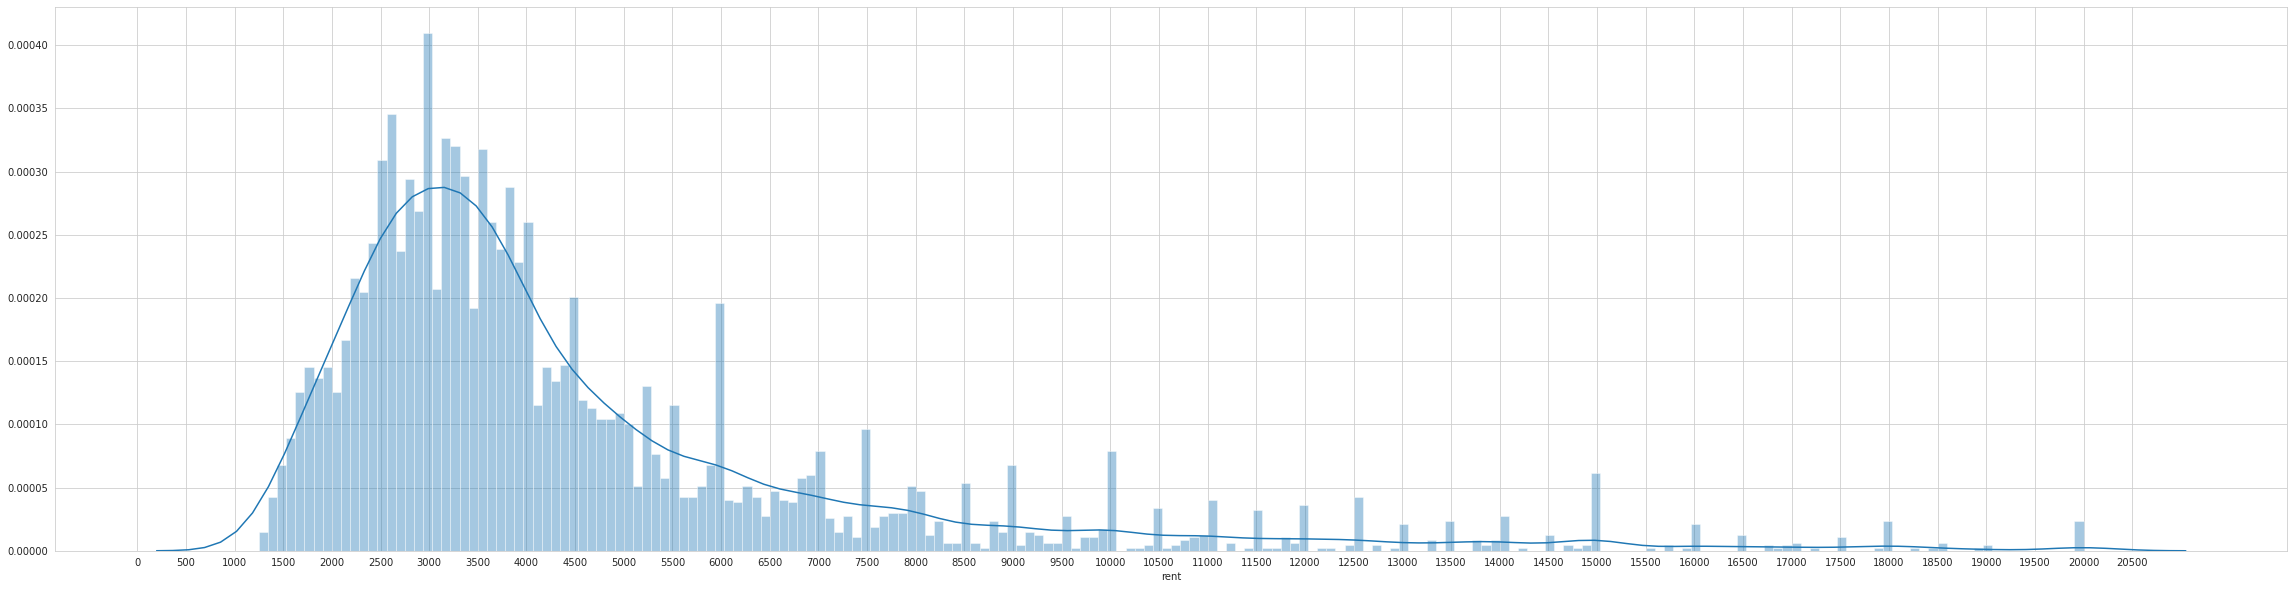

In [ ]:
plt.figure(figsize=(40, 10))
ax=sns.distplot(df.rent, bins=200)
ax.set_xticks(np.arange(0, 21000, 500));

In [ ]:
df.corr()['rent'].sort_values()

rental_id          -0.142801
building_age_yrs   -0.122302
no_fee             -0.091769
building_id        -0.001235
min_to_subway       0.003652
has_patio           0.058260
has_roofdeck        0.081286
has_gym             0.093737
has_washer_dryer    0.096136
has_dishwasher      0.096631
has_doorman         0.099106
has_elevator        0.120822
floor               0.272351
bedrooms            0.531200
bathrooms           0.733644
size_sqft           0.808784
rent                1.000000
Name: rent, dtype: float64

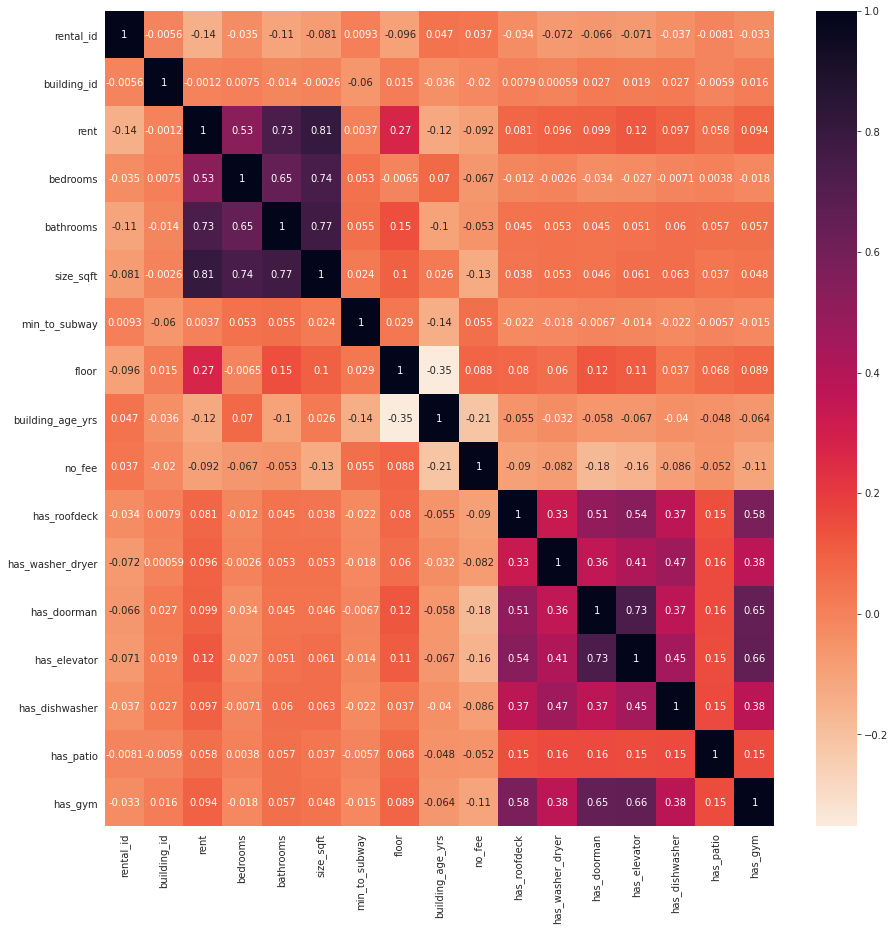

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='rocket_r', annot = True);

<Figure size 1800x1440 with 0 Axes>

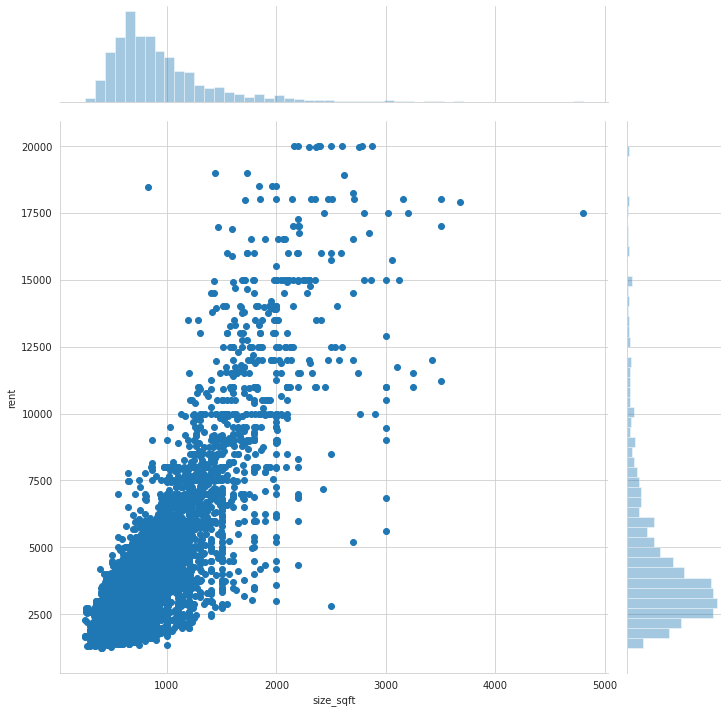

In [ ]:
plt.figure(figsize=(25,20))
sns.jointplot(data=df, x='size_sqft', y='rent', height=10);

# Exploring Boroughs

In [ ]:
df.borough.value_counts()

Manhattan    3539
Brooklyn     1013
Queens        448
Name: borough, dtype: int64

In [ ]:
df[['borough', 'rent']].groupby('borough').rent.mean()

borough
Brooklyn     3327.403751
Manhattan    5138.940379
Queens       2516.147321
Name: rent, dtype: float64

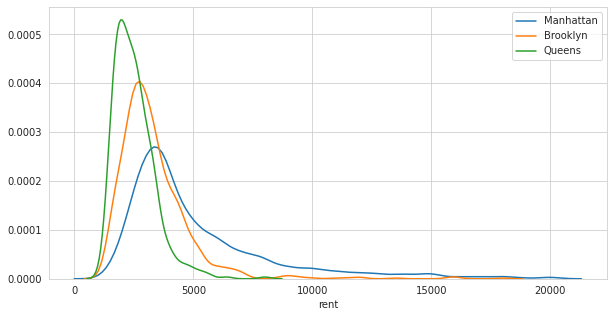

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.distplot(df[df['borough']=='Manhattan'].rent, bins=200, hist=False, label='Manhattan')
sns.distplot(df[df['borough']=='Brooklyn'].rent, bins=200, hist=False, ax=ax, label='Brooklyn')
sns.distplot(df[df['borough']=='Queens'].rent, bins=200, hist=False, ax=ax, label='Queens')
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


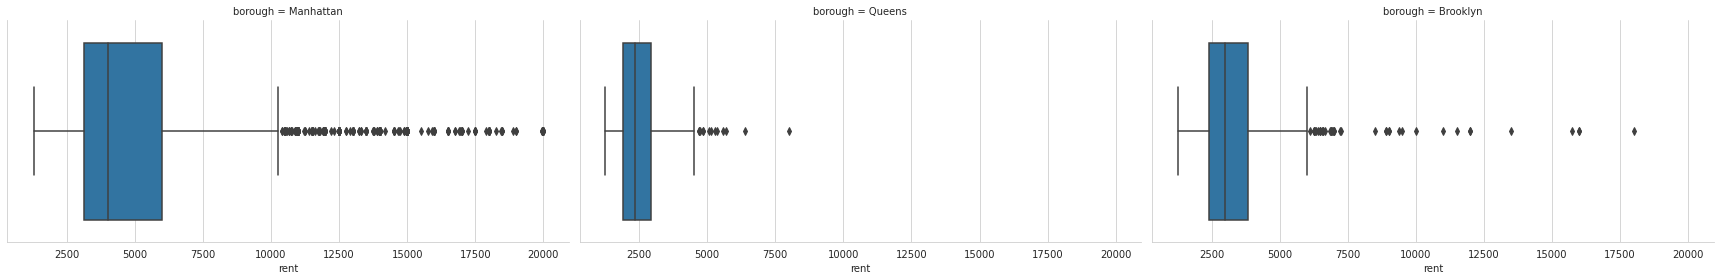

In [ ]:
g = sns.FacetGrid(df, col='borough', height=4, aspect =2 )
g.map(sns.boxplot, 'rent');

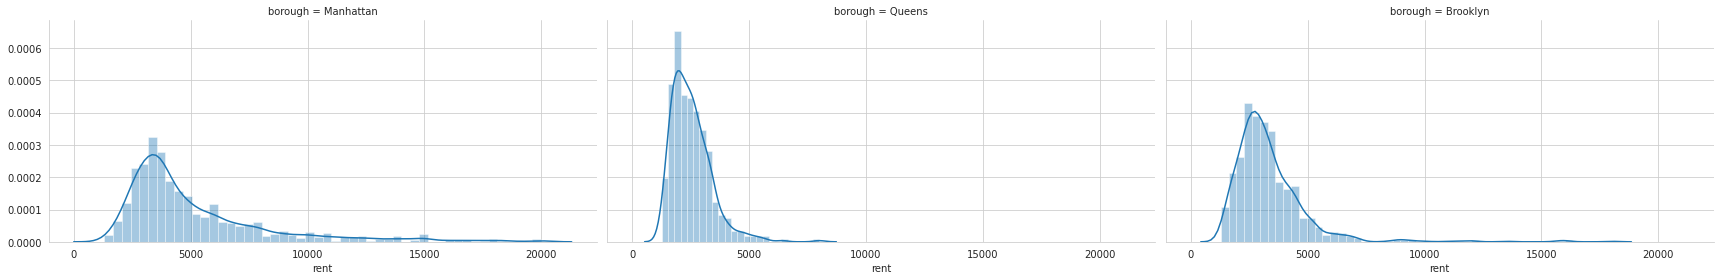

In [ ]:
g = sns.FacetGrid(df, col='borough', height=4, aspect =2 )
g.map(sns.distplot, 'rent');

<Figure size 1800x360 with 0 Axes>

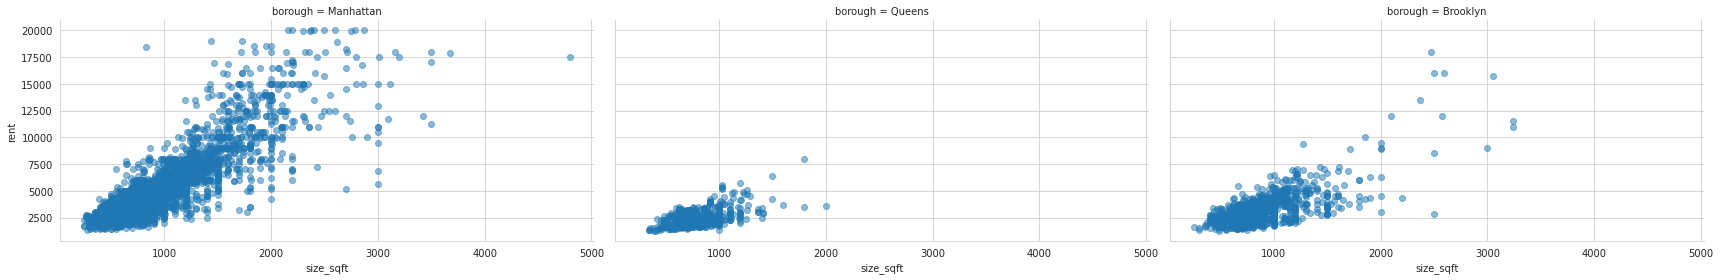

In [ ]:
plt.figure(figsize=(25,5))
g = sns.FacetGrid(df, col='borough', height=4, aspect =2 )
g.map(plt.scatter, 'size_sqft', 'rent', alpha=0.5);

# Regression Models

---



## Preprocessing


In [ ]:
df_m = df[df['borough']=='Manhattan']
# df_m = df_m[df_m.rent <= np.quantile(df_m.rent.values, 0.92)]
df_m = df_m[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'rent']]
df_m.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,2550
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,11500
3,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,4500
4,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,4795
7,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,17500


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#x = df_m.iloc[:,:-1]
x= df_m[['bedrooms', 'bathrooms', 'size_sqft']]
y = df_m['rent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Multiple Linear Regression

In [ ]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_predict = lrm.predict(x_test)
x_train.shape[0] + x_test.shape[0] == len(df_m), lrm.score(x_test, y_test), lrm.score(x_train, y_train)

(True, 0.7236352887652999, 0.7671190296975102)

In [ ]:
my_apt = [[1, 1, 600]]
lrm.predict(my_apt)

array([3082.13853835])

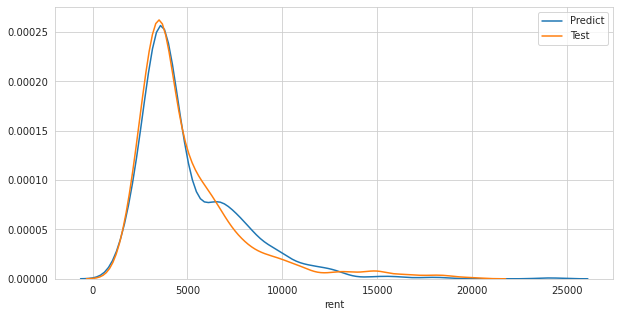

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.distplot(y_predict, bins=200, hist=False, label='Predict')
sns.distplot(y_test, bins=200, hist=False, ax=ax, label='Test');

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

rcross = cross_val_score(lrm, x, y, cv=4 )
rcross, rcross.mean()

(array([0.75031937, 0.79239304, 0.78548615, 0.77213763]), 0.7750840475883376)

In [ ]:
#You can also use the function 'cross_val_predict' to predict the output
from sklearn.model_selection import cross_val_predict
y_predict_cv = cross_val_predict(lrm, x, y, cv=4)

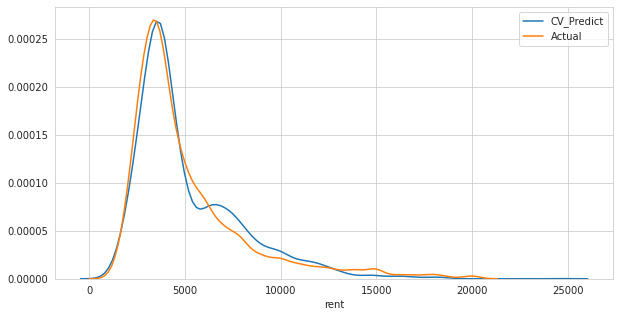

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.distplot(y_predict_cv, bins=200, hist=False, label='CV_Predict')
sns.distplot(y, bins=200, hist=False, ax=ax, label='Actual');

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

poly = LinearRegression()
poly.fit(x_train_pr, y_train)
y_predict_pr = poly.predict(x_test_pr)
poly.score(x_test_pr, y_test)

0.7643011982655575

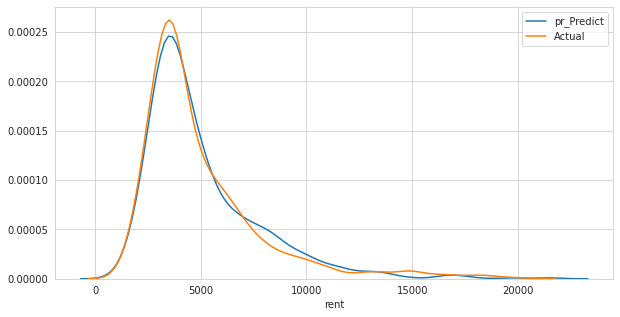

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.distplot(y_predict_pr, bins=200, hist=False, label='pr_Predict')
sns.distplot(y_test, bins=200, hist=False, ax=ax, label='Actual');

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [ ]:
RR = Ridge()
Grid = GridSearchCV(RR, parameters, cv=4)
Grid.fit(x, y)
Best_RR = Grid.best_estimator_ 
Best_RR.score(x_test, y_test)

0.7495355627670035